In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
IMG_SIZE=224
BATCH_SIZE=32

In [2]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/banana fruit',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 407 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 507 images belonging to 3 classes.


In [3]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(68,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
history=model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
13/13 [==============================] - 130s 10s/step - loss: 0.8759 - accuracy: 0.6020 - val_loss: 0.3961 - val_accuracy: 0.8462
Epoch 2/5
13/13 [==============================] - 39s 3s/step - loss: 0.2484 - accuracy: 0.9115 - val_loss: 0.3057 - val_accuracy: 0.8994
Epoch 3/5
13/13 [==============================] - 39s 3s/step - loss: 0.1921 - accuracy: 0.9386 - val_loss: 0.0996 - val_accuracy: 0.9645
Epoch 4/5
13/13 [==============================] - 48s 4s/step - loss: 0.1523 - accuracy: 0.9484 - val_loss: 0.2178 - val_accuracy: 0.9112
Epoch 5/5
13/13 [==============================] - 48s 4s/step - loss: 0.1370 - accuracy: 0.9558 - val_loss: 0.0814 - val_accuracy: 0.9803


In [8]:
model.save("MODEL1.h5","label.txt")

1/1 [==============================] - 0s 82ms/step
predicted_class  banana


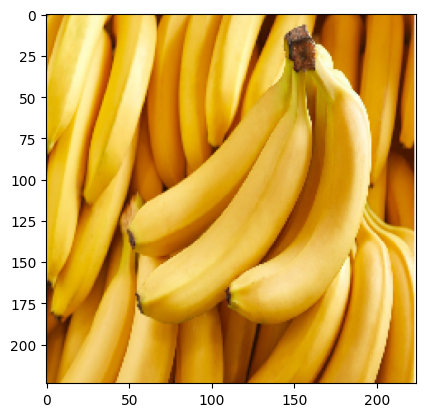

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model=load_model('/content/MODEL1.h5')
test_image_path='/content/drive/MyDrive/banana fruit/grapes fruit/008_1ac91bc0.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.
plt.imshow(img)
prediction=model.predict(img_array)
print(prediction)
classes = { 0:"banana",1:"grapes",2:"strawberry"}
prediction=model.predict(img_array)
predicted_class_index = np.argmax(prediction[0])
print("predicted_class ",classes[predicted_class_index])
#print(f"Predicted class: {predicted_class}")

